In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import heapq

In [18]:
diabetes_df=pd.read_csv(r"C:\Users\INTEL\Downloads\diabetes_dataset__2019.csv")
print(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [19]:
print(diabetes_df.describe())

              BMI       Sleep  SoundSleep  Pregancies
count  948.000000  952.000000  952.000000  910.000000
mean    25.763713    6.949580    5.495798    0.386813
std      5.402595    1.273189    1.865618    0.909455
min     15.000000    4.000000    0.000000    0.000000
25%     22.000000    6.000000    4.000000    0.000000
50%     25.000000    7.000000    6.000000    0.000000
75%     29.000000    8.000000    7.000000    0.000000
max     45.000000   11.000000   11.000000    4.000000


In [20]:
print(diabetes_df.corr())


ValueError: could not convert string to float: '50-59'

In [26]:
print('value of each column')
for col in diabetes_df.columns:
    print(col)
    print(diabetes_df[col].value_counts())
    print("\n")
diabetes_df['Age'].replace('less than 40','0-40',inplace=True)
diabetes_df['Age'].replace('60 or older','60-99',inplace=True)

# Replacing in col 'Gender' Male with 0
diabetes_df['Gender'].replace('Male','0', inplace=True)
# Replacing in col 'Gender' Female with 1
diabetes_df['Gender'].replace('Female','1', inplace=True)

# Replacing in col 'Family_Diabetes' no with 0
diabetes_df['Family_Diabetes'].replace('no','0', inplace=True)
# Replacing in col 'Family_Diabetes' yes with 1
diabetes_df['Family_Diabetes'].replace('yes','1', inplace=True)

# Replacing in col 'highBP' no with 0
diabetes_df['highBP'].replace('no','0', inplace=True)
# Replacing in col 'highBP' yes with 1
diabetes_df['highBP'].replace('yes','1', inplace=True)

# Replacing in col 'PhysicallyActive' none with 0
diabetes_df['PhysicallyActive'].replace('none',0, inplace=True)
# Replacing in col 'PhysicallyActive' less than half an hr with 1
diabetes_df['PhysicallyActive'].replace('less than half an hr',1, inplace=True)
# Replacing in col 'PhysicallyActive' more than half an hr with 2
diabetes_df['PhysicallyActive'].replace('more than half an hr',2, inplace=True)
# Replacing in col 'PhysicallyActive' one hr or more with 3
diabetes_df['PhysicallyActive'].replace('one hr or more',3, inplace=True)

# Replacing in col 'Smoking' no with 0
diabetes_df['Smoking'].replace('no','0', inplace=True)
# Replacing in col 'Smoking' yes with 1
diabetes_df['Smoking'].replace('yes','1', inplace=True)

# Replacing in col 'Alcohol' no with 0
diabetes_df['Alcohol'].replace('no','0', inplace=True)
# Replacing in col 'Alcohol' yes with 1
diabetes_df['Alcohol'].replace('yes','1', inplace=True)

# Replacing in col 'RegularMedicine' no/o with 0
diabetes_df['RegularMedicine'].replace('no','0', inplace=True)
diabetes_df['RegularMedicine'].replace('o','0', inplace=True)
# Replacing in col 'RegularMedicine' yes with 1
diabetes_df['RegularMedicine'].replace('yes','1', inplace=True)

# Replacing in col 'JunkFood' occasionally with 0
diabetes_df['JunkFood'].replace('occasionally','0', inplace=True)
# Replacing in col 'JunkFood' often with 1
diabetes_df['JunkFood'].replace('often','1', inplace=True)
# Replacing in col 'JunkFood' very often with 2
diabetes_df['JunkFood'].replace('very often','2', inplace=True)
# Replacing in col 'JunkFood' always with 3
diabetes_df['JunkFood'].replace('always','3', inplace=True)

# Replacing in col 'Stress' not at all with 0
diabetes_df['Stress'].replace('not at all','0', inplace=True)
# Replacing in col 'Stress' sometimes with 1
diabetes_df['Stress'].replace('sometimes','1', inplace=True)
# Replacing in col 'Stress' very often with 2
diabetes_df['Stress'].replace('very often','2', inplace=True)
# Replacing in col 'Stress' always with 3
diabetes_df['Stress'].replace('always','3', inplace=True)

# remove capital letter and space
diabetes_df['BPLevel'] = diabetes_df['BPLevel'].str.lower().str.strip()
# Replacing in col 'BPLevel' low with 0
diabetes_df['BPLevel'].replace('low',0, inplace=True)
# Replacing in col 'BPLevel' normal with 1
diabetes_df['BPLevel'].replace('normal',1, inplace=True)
# Replacing in col 'BPLevel' high with 2
diabetes_df['BPLevel'].replace('high',2, inplace=True)

# Column 'Pregancies': replacing the null values with 0
diabetes_df['Pdiabetes'] = diabetes_df['Pdiabetes'].fillna(0)
# Replacing in col 'Pdiabetes' no with 0
diabetes_df['Pdiabetes'].replace('no','0', inplace=True)
# Replacing in col 'Pdiabetes' yes with 1
diabetes_df['Pdiabetes'].replace('yes','1', inplace=True)

# Replacing in col 'UriationFreq' not much with 0
diabetes_df['UriationFreq'].replace('not much','0', inplace=True)
# Replacing in col 'UriationFreq' quite often with 1
diabetes_df['UriationFreq'].replace('quite often','1', inplace=True)

# remove capital letter in col 'Diabetic'
diabetes_df['Diabetic'] = diabetes_df['Diabetic'].str.strip()
# Replace null value with 0
diabetes_df['Diabetic'] = diabetes_df['Diabetic'].fillna(0)
# Replacing in col 'Diabetic' no with 0
diabetes_df['Diabetic'].replace('no', '0', inplace=True)
# Replacing in col 'Diabetic' yes with 1
diabetes_df['Diabetic'].replace('yes', '1', inplace=True)

# Column 'Pregancies': replacing the null values with 0
diabetes_df['Pregancies'] = diabetes_df['Pregancies'].fillna(0)

# Remove rows with nullvalues in BMI col because i think that BMI is an important variable, so I don't want to replace nan with the mean of this col like this:
# diabetes_df['BMI'] = diabetes_df['BMI'].fillna(diabetes_df['BMI'].mean())
# So i take only the rows where BMI is not null
diabetes_df = diabetes_df[diabetes_df['BMI'].notna()]

value of each column
Age
Age
less than 40    488
40-49           164
50-59           156
60 or older     144
Name: count, dtype: int64


Gender
Gender
Male      580
Female    372
Name: count, dtype: int64


Family_Diabetes
Family_Diabetes
no     498
yes    454
Name: count, dtype: int64


highBP
highBP
no     724
yes    228
Name: count, dtype: int64


PhysicallyActive
PhysicallyActive
less than half an hr    336
more than half an hr    272
one hr or more          212
none                    132
Name: count, dtype: int64


BMI
BMI
24.0    111
21.0     88
23.0     76
28.0     71
26.0     66
33.0     64
27.0     63
22.0     58
20.0     48
19.0     36
25.0     34
30.0     33
18.0     32
29.0     28
38.0     28
36.0     20
17.0     16
32.0     16
31.0     16
34.0     12
35.0     12
15.0      8
39.0      4
40.0      4
42.0      3
45.0      1
Name: count, dtype: int64


Smoking
Smoking
no     844
yes    108
Name: count, dtype: int64


Alcohol
Alcohol
no     760
yes    192
Name: count, dtype: i

C:\Users\INTEL\AppData\Local\Temp\ipykernel_19836\1307735725.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_df['Gender'].replace('Male','0', inplace=True)
C:\Users\INTEL\AppData\Local\Temp\ipykernel_19836\1307735725.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [27]:
diabetic_mask = diabetes_df['Diabetic'] == '1'
diabetic_df = diabetes_df[diabetic_mask]

not_diabetic_mask = diabetes_df['Diabetic'] == '0'
not_diabetic_df = diabetes_df[not_diabetic_mask]

diabetic_df.to_csv('diab_clean.csv', encoding='utf-8', index=False)
diabetic_clean_df = pd.read_csv('diab_clean.csv')
diabetic_clean_df['Diabetic'] = diabetic_clean_df['Diabetic'].fillna(1)

not_diabetic_df.to_csv('not_diab_clean.csv', encoding='utf-8', index=False)
not_diabetic_clean_df = pd.read_csv('not_diab_clean.csv')
not_diabetic_clean_df['Diabetic'] = not_diabetic_clean_df['Diabetic'].fillna(0)

frames = [diabetic_clean_df, not_diabetic_clean_df]
diabetes_clean_df = pd.concat(frames)
diabetes_clean_df.to_csv('diabetes_clean_df.csv', encoding='utf-8', index=False)

diab_df = pd.read_csv('diab_clean.csv')
not_diab_df = pd.read_csv('not_diab_clean.csv')

print('--------- Cleaned dataset merged ---------')
print(diabetes_clean_df.info())
print(diabetes_clean_df.corr())

--------- Cleaned dataset merged ---------
<class 'pandas.core.frame.DataFrame'>
Index: 948 entries, 0 to 682
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               948 non-null    object 
 1   Gender            948 non-null    int64  
 2   Family_Diabetes   948 non-null    int64  
 3   highBP            948 non-null    int64  
 4   PhysicallyActive  948 non-null    int64  
 5   BMI               948 non-null    float64
 6   Smoking           948 non-null    int64  
 7   Alcohol           948 non-null    int64  
 8   Sleep             948 non-null    int64  
 9   SoundSleep        948 non-null    int64  
 10  RegularMedicine   948 non-null    int64  
 11  JunkFood          948 non-null    int64  
 12  Stress            948 non-null    int64  
 13  BPLevel           948 non-null    int64  
 14  Pregancies        948 non-null    float64
 15  Pdiabetes         948 non-null    int64  
 16  Uriati

ValueError: could not convert string to float: '40-49'

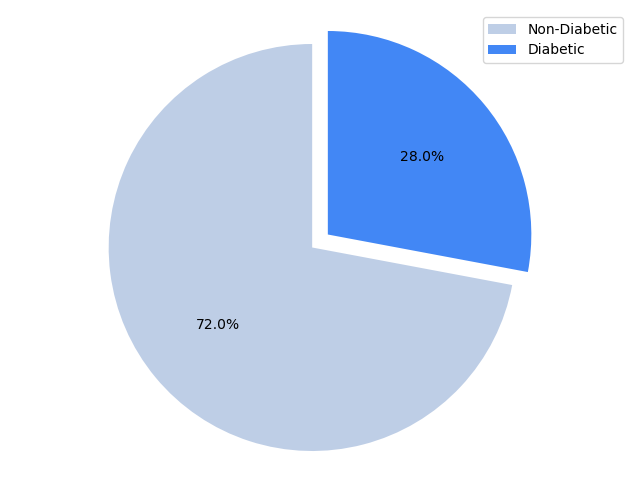

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))
label = ['Non-Diabetic', 'Diabetic']
diabetic_count = list(diabetes_clean_df['Diabetic'].value_counts())
colors_df = ['#becee6', '#4287f5'] # not, diab
explode = (0.1, 0)
ax.pie(diabetic_count, explode=explode, autopct='%.1f%%',
        shadow=False, startangle=90, colors=colors_df)
ax.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle
plt.legend(label, loc='best')
plt.show()

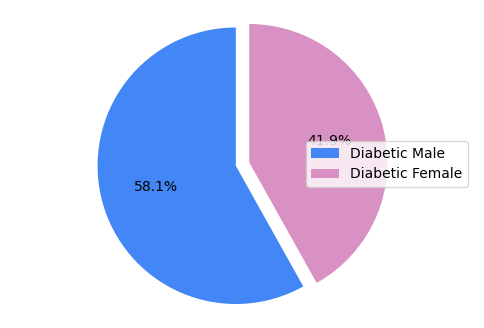

In [29]:
diabetic_label = ['Diabetic Male', 'Diabetic Female']
diabetic_count = list(diab_df['Gender'].value_counts())
colors_df = ['#4287f5', '#D991C3']
explode = (0.1, 0)
fig, ax = plt.subplots(figsize=(6, 4))
ax.pie(diabetic_count, explode=explode, autopct='%.1f%%',
        shadow=False, startangle=90, colors=colors_df)
ax.axis('equal')
plt.legend(diabetic_label, loc='best')
plt.show()

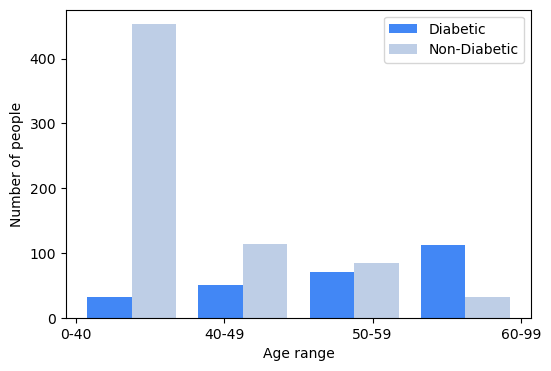

In [30]:
diab_df = diab_df.sort_values(by='Age')
not_diab_df = not_diab_df.sort_values(by='Age')
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist([diab_df.Age, not_diab_df.Age], 
    label=['Diabetic', 'Non-Diabetic'], 
    color=['#4287f5', '#becee6'], 
    bins=len(diab_df['Age'].unique())
)
ax.set_xlabel("Age range")
ax.set_ylabel("Number of people")
# set the x-axis labels to the unique values in the age column
ax.set_xticks(diab_df['Age'].unique())
ax.set_xticklabels(diab_df['Age'].unique())
plt.legend(loc='upper right')
plt.show()

In [31]:
diab_BMI_counts = diab_df.BMI.shape[0]
not_diab_BMI_counts = not_diab_df.shape[0]
tot = diabetes_clean_df.shape[0]
print("diab_BMI_counts: ", diab_BMI_counts)
print("not_diab_BMI_counts: ", not_diab_BMI_counts)
print("tot_bmi: ", tot)    
print("----------")

diab_BMI_counts:  265
not_diab_BMI_counts:  683
tot_bmi:  948
----------


ValueError: could not convert string to float: '40-49'

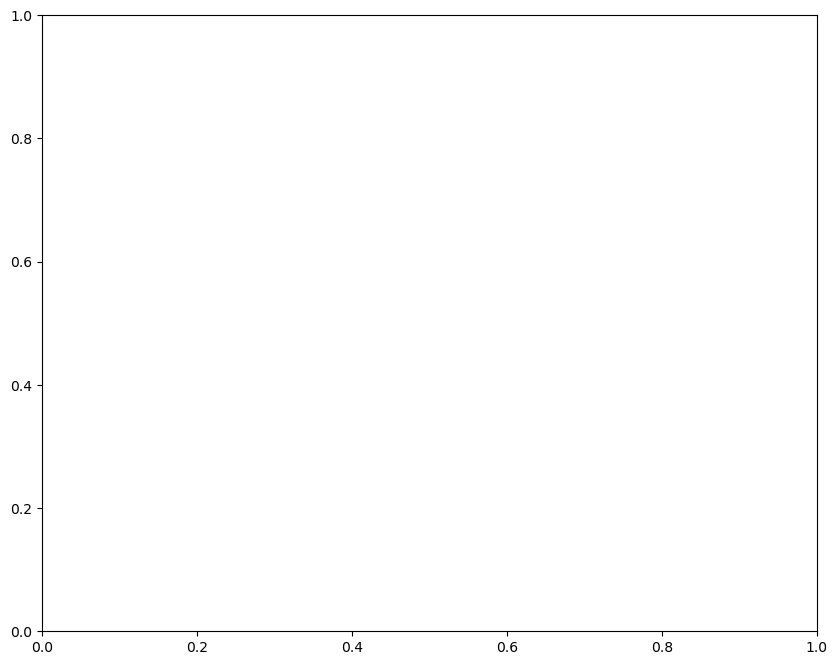

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))
corr = diabetes_clean_df.corr()
sns.heatmap(corr, 
cmap=sns.color_palette("light:#124683", n_colors=20),
vmin=-1.0, vmax=1.0,
square=True, ax=ax,
annot=True, fmt=".2f")
plt.show()
# show the 5 highest_values (excluding 1 and duplicates)
highest_values = [float(item.get_text()) for item in ax.texts]
filtered_highest_values = [val for val in highest_values if val != 1]
unique_highest_values = set(filtered_highest_values)
top_5_highest_values = heapq.nlargest(5, unique_highest_values)

print(top_5_highest_values)
# The most correlations between the variable "Diabetic" are the variables "RegularMedicine" and "BPLevel".